In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-gdp-by-ozgur-cem-tas/gdp_growth.csv
/kaggle/input/world-gdp-by-ozgur-cem-tas/gdp_ppp_per_capita.csv
/kaggle/input/world-gdp-by-ozgur-cem-tas/gdp_ppp.csv
/kaggle/input/world-gdp-by-ozgur-cem-tas/gdp.csv
/kaggle/input/world-gdp-by-ozgur-cem-tas/gdp_per_capita.csv
/kaggle/input/world-gdp-by-ozgur-cem-tas/gdp_per_capita_growth.csv
/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")

#Drop train and test duplicates and Nan values
train = train.drop_duplicates().dropna()
test = test.drop_duplicates()

#Drop id both dataframes
train.drop(columns = ['id'],inplace=True)

test.drop(columns = ['id'],inplace=True)


In [3]:
train['country'].value_counts().index.tolist()

['Finland', 'Italy', 'Norway', 'Singapore', 'Canada', 'Kenya']

In [4]:
#Convert date column to datetime type:
def convert_datetime(df):
    df['date'] = pd.to_datetime(df['date'])
convert_datetime(train)
convert_datetime(test)

for col in train.columns.tolist():
    print(train[col].value_counts())
    print("=="*30)
print("The range of train date: ")
print(train['date'].sort_values(ascending=True))

print("The range of test date: ")
print(test['date'].sort_values(ascending=True))
#So the range of date begins with the very first of 2010 and ends with the last day of 2019

date
2010-01-01    88
2013-10-20    88
2013-10-28    88
2013-10-27    88
2013-10-26    88
              ..
2014-07-14    84
2010-04-21    83
2010-06-01    83
2010-05-11    83
2010-04-01    83
Name: count, Length: 2557, dtype: int64
country
Finland      38355
Italy        38355
Norway       38355
Singapore    38355
Canada       34109
Kenya        33730
Name: count, dtype: int64
store
Premium Sticker Mart    75684
Stickers for Less       74044
Discount Stickers       71531
Name: count, dtype: int64
product
Kaggle                46026
Kaggle Tiers          46026
Kerneler Dark Mode    46025
Kerneler              45962
Holographic Goose     37220
Name: count, dtype: int64
num_sold
5.0       1947
6.0       1703
16.0      1434
7.0       1382
15.0      1365
          ... 
3621.0       1
3683.0       1
4139.0       1
3349.0       1
3996.0       1
Name: count, Length: 4037, dtype: int64
The range of train date: 
1        2010-01-01
65       2010-01-01
64       2010-01-01
63       2010-01-01
62  

In [5]:
# Convert the date column to get meaningful data
def eda(df):
    # Apply tqdm to show progress
    tqdm.pandas()

    df['year'] = df['date'].dt.year
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['quater'] = df['date'].dt.quarter  # Fix typo (should be .quarter)
    df['day_of_week'] = df['date'].dt.day_name()
    df['month_name'] = df['date'].dt.month_name()  # Fixed to use .dt
    df['week'] = df['date'].dt.isocalendar().week
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['quarter_sin'] = np.sin(2 * np.pi * df['quater'] / 4)
    df['quarter_cos'] = np.cos(2 * np.pi * df['quater'] / 4)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

    # Drop 'date' column
    df.drop('date', axis=1, inplace=True)

    # Adding progress bar for transformations
    df['cos_year'] = np.cos(df['year'] * (2 * np.pi) / 100)
    df['sin_year'] = np.sin(df['year'] * (2 * np.pi) / 100)
    
    # Apply tqdm to get_dummies for the categorical columns
    dummy_prefixes = ['store', 'product', 'month_name', 'day_of_week']
    df = pd.get_dummies(df, columns=dummy_prefixes, drop_first=True)

    return df

# Assuming train and test DataFrames are defined
train = eda(train)
test = eda(test)


In [6]:
#Get the world_gdp
gdp_per_capita_df = pd.read_csv("/kaggle/input/world-gdp-by-ozgur-cem-tas/gdp_per_capita.csv")
gdp_per_capita_df

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4346.637931,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1446.536472,1607.152173,1674.002572,1601.830063,1152.720966,964.264811,758.145242,NaN,NaN,NaN
263,South Africa,ZAF,443.009920,454.962013,473.011405,511.497364,548.996058,584.704163,621.220543,675.135345,...,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654,NaN
264,Zambia,ZMB,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,343.373670,360.201239,...,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436,NaN


In [7]:
gdp_per_capita_df[gdp_per_capita_df['Country Name']=='Canada'][f'{2017}']

35    45129.35644
Name: 2017, dtype: float64

In [8]:
def get_gdp(row):
    country = row['country']
    year = str(row['year'])
    if country in gdp_per_capita_df['Country Name'].values:
        
        return gdp_per_capita_df.loc[gdp_per_capita_df['Country Name'] == country, year].values[0]
    else:
        return None

train['country_gdp_through_year'] = train.apply(get_gdp, axis=1)
test['country_gdp_through_year'] = test.apply(get_gdp, axis=1)
train = pd.get_dummies(train, columns=['country'], prefix='country')
test = pd.get_dummies(test, columns=['country'], prefix='country')

In [23]:
df = pd.concat([train, test], axis=0, ignore_index=True)
df = pd.get_dummies(df, columns=['country'], prefix='country')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319809 entries, 0 to 319808
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   num_sold                    221259 non-null  float64
 1   year                        319809 non-null  int32  
 2   day                         319809 non-null  int32  
 3   month                       319809 non-null  int32  
 4   quater                      319809 non-null  int32  
 5   week                        319809 non-null  UInt32 
 6   month_sin                   319809 non-null  float64
 7   month_cos                   319809 non-null  float64
 8   quarter_sin                 319809 non-null  float64
 9   quarter_cos                 319809 non-null  float64
 10  day_sin                     319809 non-null  float64
 11  day_cos                     319809 non-null  float64
 12  cos_year                    319809 non-null  float64
 13  sin_year      

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet,Ridge,SGDRegressor,BayesianRidge,TheilSenRegressor,RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

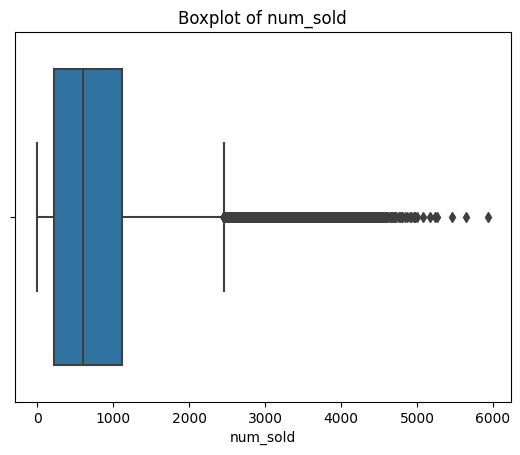

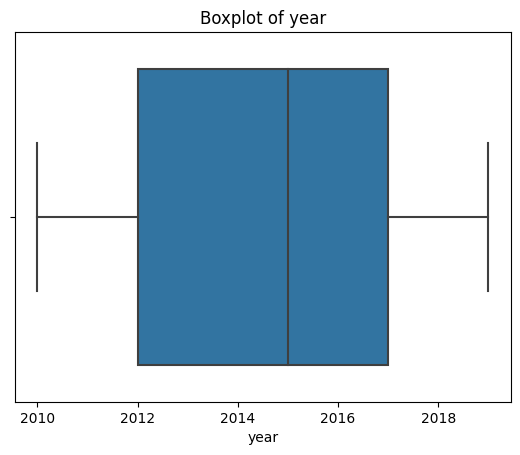

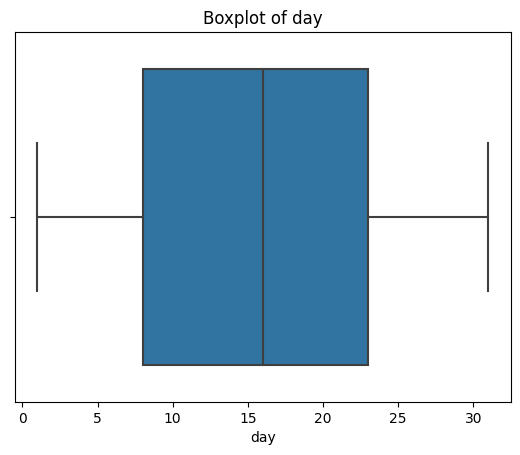

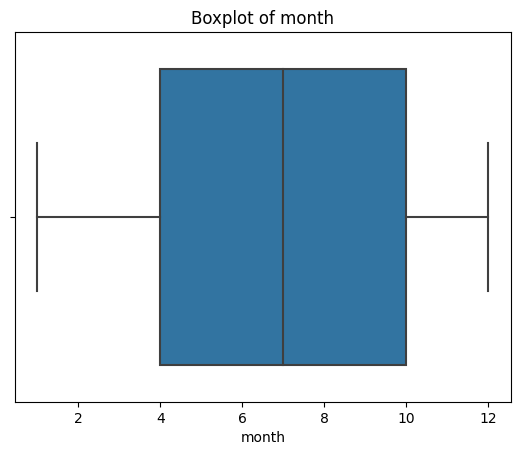

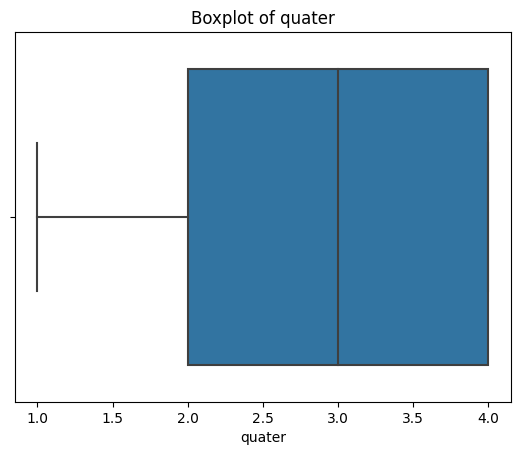

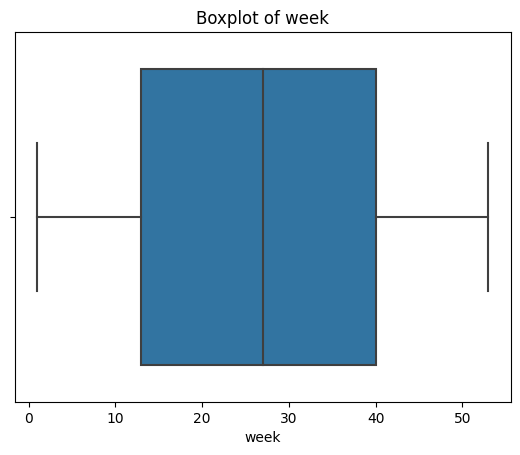

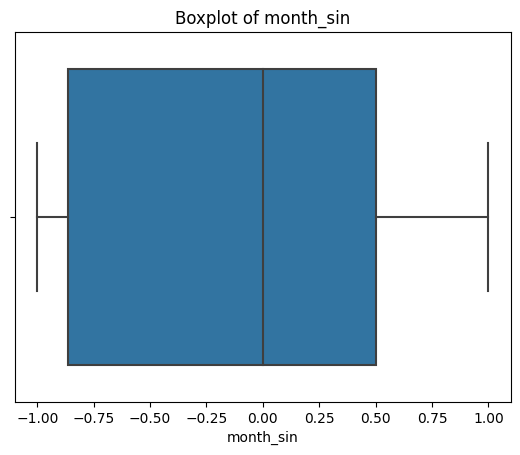

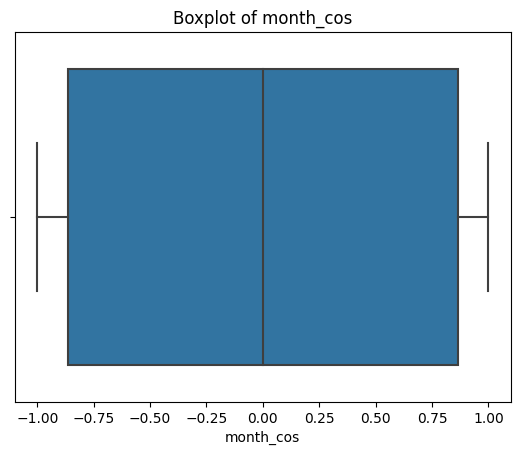

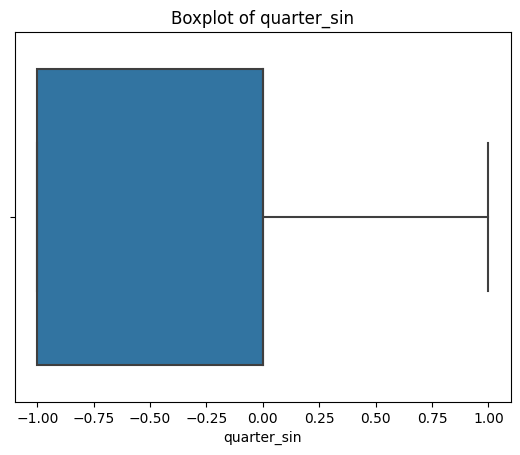

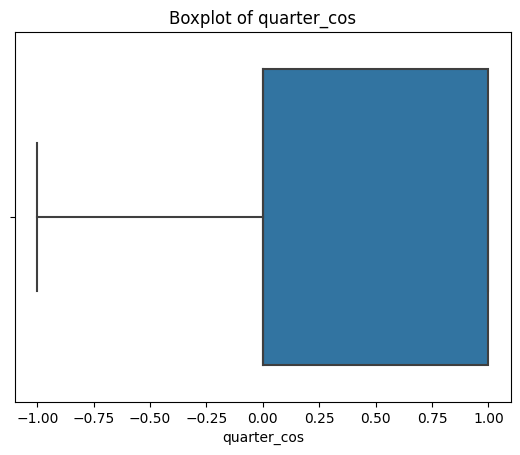

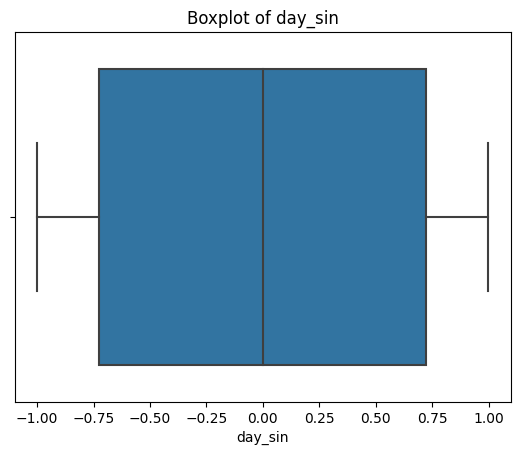

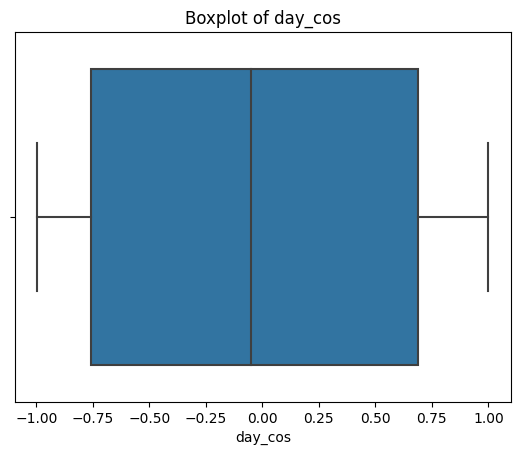

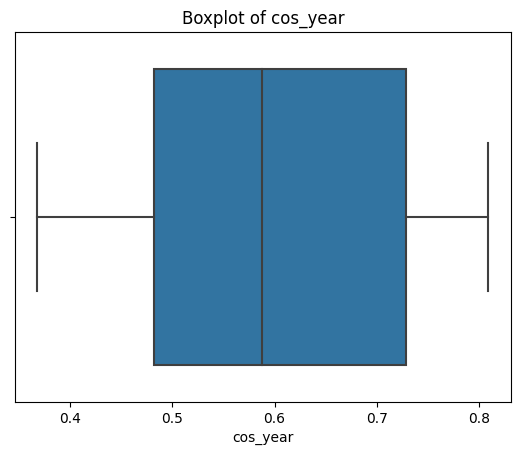

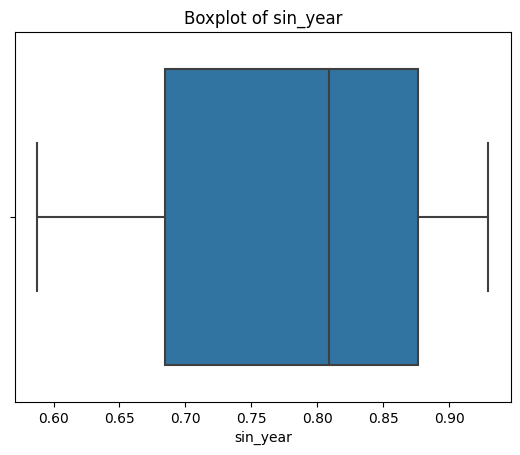

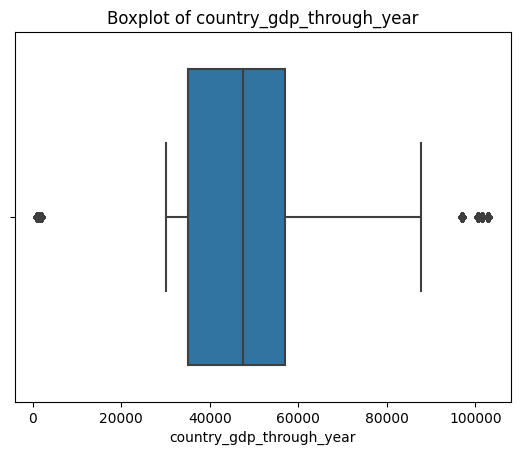

In [15]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [17]:
"""df = df[(df['country_gdp_through_year']>20000)&(df['country_gdp_through_year']<90000)]
sns.boxplot(x=df['country_gdp_through_year'])
plt.title('Boxplot of country_gdp_through_year')
plt.show()"""

"df = df[(df['country_gdp_through_year']>20000)&(df['country_gdp_through_year']<90000)]\nsns.boxplot(x=df['country_gdp_through_year'])\nplt.title('Boxplot of country_gdp_through_year')\nplt.show()"

In [34]:
def rmsle(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.maximum(np.array(y_pred), 0)
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2))

In [29]:
x = train.drop(columns = ['num_sold'])
y = train['num_sold']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=16)

In [35]:
def model_list(models, random_state_num, x_train, x_test, y_train, y_test):
    rmsle_score_dict = {}
    for model_class in models:
        model = model_class(random_state=random_state_num)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        model_name = model_class.__name__
        
        rmsle_score_dict[model_name] = rmsle(y_test, y_pred)
    
    return rmsle_score_dict

models = [DecisionTreeRegressor, GradientBoostingRegressor, RandomForestRegressor, XGBRegressor, LGBMRegressor]

rmsle_scores = model_list(models, 16, x_train, x_test, y_train, y_test)

print("RMSLE Scores for different models:")
for model_name, score in rmsle_scores.items():
    print(f"{model_name}: {score:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 177007, number of used features: 43
[LightGBM] [Info] Start training from score 753.775964
RMSLE Scores for different models:
DecisionTreeRegressor: 0.0872
GradientBoostingRegressor: 1.0420
RandomForestRegressor: 0.0644
XGBRegressor: 0.3951
LGBMRegressor: 0.4201


In [39]:
def linear_model_list(models, x_train, x_test, y_train, y_test):
    rmsle_score_dict = {}
    for model_class in models:
        model = model_class()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        model_name = model_class.__name__
        
        rmsle_score_dict[model_name] = rmsle(y_test, y_pred)
    
    return rmsle_score_dict

models = [LinearRegression, Lasso, ElasticNet,Ridge,SGDRegressor,BayesianRidge,TheilSenRegressor,RANSACRegressor]

rmsle_scores = linear_model_list(models, x_train, x_test, y_train, y_test)

print("RMSLE Scores for different models:")
for model_name, score in rmsle_scores.items():
    print(f"{model_name}: {score:.4f}")

RMSLE Scores for different models:
LinearRegression: 1.3944
Lasso: 1.3826
ElasticNet: 0.9942
Ridge: 1.3932
SGDRegressor: 32.7236
BayesianRidge: 1.3932
TheilSenRegressor: 5.1153
RANSACRegressor: 1.2464


In [48]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'n_estimators': 1000,
    'learning_rate': 0.08,
    'max_depth': 13,
    'reg_alpha': 0.01,
    'lambda_l2': 0.01,  
    'min_child_samples' : 32,
    'colsample_bytree': 0.93,
    'subsample': 0.7, 
    'seed': 42,
    'verbose': -1,
    'device' : 'cpu' 
}
LGBM_model = LGBMRegressor(**params)
LGBM_model.fit(x_train, y_train)
y_pred = LGBM_model.predict(x_test)

# Calculate RMSLE score
score = rmsle(y_test, y_pred)
print(f"RMSLE for LGBMRegressor: {score:.4f}")

RMSLE for LGBMRegressor: 0.2648


In [43]:
from catboost import CatBoostRegressor
params = {
    'iterations': 1000,               # Number of boosting rounds (trees)
    'learning_rate': 0.08,            # Learning rate
    'depth': 13,                      # Depth of trees
    'l2_leaf_reg': 0.01,              # L2 regularization
    'border_count': 128,              # Number of splits for continuous features
    'bagging_temperature': 0.7,       # Controls randomness for sampling
    'random_seed': 42,                # Random seed for reproducibility
    'eval_metric': 'RMSE',            # Evaluation metric (Root Mean Squared Error)
    'verbose': 200,                   # Print info every 200 iterations
}
catboost_model  = CatBoostRegressor(**params)
catboost_model .fit(x_train, y_train)
y_pred = catboost_model .predict(x_test)

# Calculate RMSLE score
score = rmsle(y_test, y_pred)
print(f"RMSLE for CatBoostRegressor: {score:.4f}")

0:	learn: 638.3564763	total: 183ms	remaining: 3m 3s
200:	learn: 49.8083742	total: 14.6s	remaining: 58.2s
400:	learn: 40.7736447	total: 29s	remaining: 43.3s
600:	learn: 35.0406465	total: 43.6s	remaining: 28.9s
800:	learn: 31.1910896	total: 58.3s	remaining: 14.5s
999:	learn: 27.9812776	total: 1m 12s	remaining: 0us
RMSLE for CatBoostRegressor: 0.2341
